# header

In [1]:
'''
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}

setInterval(ConnectButton,60000);
'''

from google.colab import drive
from os import chdir

drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/Gproject/MIT_glyco'
chdir(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import os
from os.path import exists
print(os.getcwd()) # current working directory

update = True

/content/drive/MyDrive/Gproject/MIT_glyco


In [3]:
load_name = "./data/data_for_ml.csv"
protein_list = list(pd.read_csv(load_name).protein.unique())
protein_augmented = [name for name in protein_list if exists(f'./data/data_for_ml(augmented)/{name}.csv')]

dataset = []
for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    dataset.append(pd.read_csv(load_path))
dataset = pd.concat(dataset, axis=0).reset_index(drop=True)

positive = dataset[dataset['positivity']==1]

print("total number of proteins:          ", len(protein_list))
print("total number of augmented proteins:", len(protein_augmented))
print("total number of positive sites:    ", len(positive))

total number of proteins:           272
total number of augmented proteins: 89
total number of positive sites:     185


## parameter settings

In [4]:
from src.Data import *
from src.Preprocessing import *
from src.models import *

variables = xy_variables()
test_size = 0.2
valid_size = test_size/(1-test_size)

import random
random_state = 1
n_cv = 20

hpo_counts = 30
hpo_config = {
    "n_layers" : range(1,11),
    "n_neurons" : [16, 32, 64, 128, 256]
}
metrics = ['rnn_layers', 'rnn_neurons', 'dnn_layers', 'dnn_neurons', 
           'epoch', 'time', 'loss', 'val_loss', 'test_loss', 'accuracy', 'precision', 'recall', 'f1']
method = "random"

# model

In [5]:
model_name = 'augmented_rnn_important_features_plus10'
x_important = pd.read_csv('./data/features-important-names.csv').column_name.to_list()
x_important

['net_charge_all_around_target_ser_thr',
 'number_of_arg',
 'number_of_g',
 'number_of_ser',
 'number_of_thr',
 'number_of_v',
 'HSE_alpha_down',
 'nAli',
 'nS/nT',
 'Tau(i-2=>i+2)',
 'all_atom_positive_charge_all_around_target_ser_thr',
 'all_atom_positive_charge_all_backbone_around_target_ser_thr',
 'all_atom_positive_charge_all_backbone_with_around_target_ser_thr',
 'all_atom_positive_charge_all_sidechain_around_target_ser_thr',
 'all_atom_positive_charge_all_with_around_target_ser_thr',
 'all_sasa_cys',
 'all_sasa_leu',
 'all_sasa_lys',
 'all_sasa_met',
 'all_sasa_phe',
 'exposed_charge_all_sidechain_with_around_target_ser_thr',
 'exposed_charge_all_with_around_target_ser_thr',
 'net_charge_all_backbone_around_target_ser_thr',
 'net_charge_all_backbone_with_around_target_ser_thr',
 'net_charge_all_sidechain_around_target_ser_thr',
 'net_charge_all_sidechain_with_around_target_ser_thr',
 'net_charge_all_with_around_target_ser_thr',
 'number_of_aromatic',
 'number_of_e',
 'number_of_

In [6]:
x_cts   = [
    'ASA', 'Phi', 'Psi', 'Theta(i-1=>i+1)', 'Tau(i-2=>i+2)', 'HSE_alpha_up', 'HSE_alpha_down', 'P(C)', 'P(H)', 'P(E)', 'flexibility',
    'net_charge_all_around_target_ser_thr',
    'number_of_arg',
    'number_of_g',
    'number_of_ser',
    'number_of_thr',
    'number_of_v'
]
x_cat   = ['SEQ', 'SS',  
           'nAli','nS/nT',]
y_label = variables.y_label

print(f"{len(x_cts)} x_cts")
print(f"{len(x_cat)} x_cat: {x_cat}")
print(f"{len(y_label)} y_label: {y_label}")

data_x, data_y = df_to_dummy(dataset, x_cts, x_cat, y_label)
display(dict(zip(range(len(data_x.columns)), data_x.columns)))

17 x_cts
4 x_cat: ['SEQ', 'SS', 'nAli', 'nS/nT']
1 y_label: ['positivity']
dummy x shape: (59027, 60)
dummy y shape: (59027, 1)


{0: 'ASA',
 1: 'Phi',
 2: 'Psi',
 3: 'Theta(i-1=>i+1)',
 4: 'Tau(i-2=>i+2)',
 5: 'HSE_alpha_up',
 6: 'HSE_alpha_down',
 7: 'P(C)',
 8: 'P(H)',
 9: 'P(E)',
 10: 'flexibility',
 11: 'net_charge_all_around_target_ser_thr',
 12: 'number_of_arg',
 13: 'number_of_g',
 14: 'number_of_ser',
 15: 'number_of_thr',
 16: 'number_of_v',
 17: 'SEQ_A',
 18: 'SEQ_C',
 19: 'SEQ_D',
 20: 'SEQ_E',
 21: 'SEQ_F',
 22: 'SEQ_G',
 23: 'SEQ_H',
 24: 'SEQ_I',
 25: 'SEQ_K',
 26: 'SEQ_L',
 27: 'SEQ_M',
 28: 'SEQ_N',
 29: 'SEQ_P',
 30: 'SEQ_Q',
 31: 'SEQ_R',
 32: 'SEQ_S',
 33: 'SEQ_T',
 34: 'SEQ_V',
 35: 'SEQ_W',
 36: 'SEQ_Y',
 37: 'SS_C',
 38: 'SS_E',
 39: 'SS_H',
 40: 'nAli_0',
 41: 'nAli_1',
 42: 'nAli_2',
 43: 'nAli_3',
 44: 'nS/nT_0',
 45: 'nS/nT_1',
 46: 'nS/nT_2',
 47: 'nS/nT_3',
 48: 'nS/nT_4',
 49: 'nS/nT_5',
 50: 'nS/nT_6',
 51: 'nS/nT_7',
 52: 'nS/nT_8',
 53: 'nS/nT_9',
 54: 'nS/nT_10',
 55: 'nS/nT_11',
 56: 'nS/nT_12',
 57: 'nS/nT_13',
 58: 'nS/nT_14',
 59: 'nS/nT_15'}

In [7]:
window_size = 10

rnn_input  = []
rnn_output = []

for name in protein_augmented:
    load_path = f'./data/data_for_ml(augmented)/{name}.csv'
    temp = pd.read_csv(load_path)
    temp_x, temp_y = custom_dummy(temp, x_cts, x_cat, y_label)
    
    temp_input, temp_output = data_to_sequence(temp_x, temp_y, window_size)
    rnn_input.append(temp_input)
    rnn_output.append(temp_output)
    
rnn_input  = np.concatenate(rnn_input, axis=0)
rnn_output = np.concatenate(rnn_output, axis=0)

print(f'rnn input shape : {rnn_input.shape}')
print(f'rnn output shape: {rnn_output.shape}')

rnn input shape : (8910, 21, 64)
rnn output shape: (8910, 1)


## cross validation

In [8]:
# select n_layers and n_neurons as the best values of HPO
rnn_layers = 2
rnn_neurons = 100
dnn_layers = 5
dnn_neurons = 100
cv_path = f'./result/cv_result_{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_{n_cv}.csv'

cv_result = pd.DataFrame([], columns=metrics)
if not exists(cv_path) or update:
    for i in range(n_cv):
        print(f"\n{i+1}th iteration")
        random.seed(i+1)
        train_x, train_y, test_x, test_y, _, _ = stratified_split(rnn_input, rnn_output, 
                                                              test_size=test_size, random_state=i+1, 
                                                              scale_x=x_cts, scale_y=[])
        train_x, train_y = up_sampling(train_x, train_y) 

        history_size = train_x.shape[1]
        x_dim = train_x.shape[2]
        y_dim = train_y.shape[1]
        save_path  = f'./h5/{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_cv_{i+1}of{n_cv}.h5'

        model = RNN(history_size, x_dim, y_dim)
        model.build(rnn_layers, rnn_neurons, dnn_layers, dnn_neurons)
        if not exists(save_path) or update:
            model.train(train_x, train_y, valid_data=[test_x, test_y], save_path=save_path, verbose=2)
        else:
            model.load_model(save_path)

        epoch = model.epoch
        time = model.time
        loss = model.loss
        val_loss = model.val_loss
        test_loss, accuracy, precision, recall, f1 = model.evaluate(test_x, test_y)
        cv = pd.DataFrame([[rnn_layers, rnn_neurons, dnn_layers, dnn_neurons, epoch, time, loss, val_loss, test_loss, accuracy, 
                             precision[1], recall[1], f1[1]]], columns=metrics)
        cv_result = pd.concat([cv_result, cv], axis=0)
    cv_result = cv_result.reset_index(drop=True)
    cv_result.to_csv(cv_path, index=False)    
    
else:
    cv_result = pd.read_csv(cv_path)

display(cv_result)


1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
Epoch 1/10000
437/437 - 8s - loss: 0.4598 - accuracy: 0.7686 - val_loss: 0.2545 - val_accuracy: 0.9068 - 8s/epoch - 19ms/step
Epoch 2/10000
437/437 - 3s - loss: 0.1645 - accuracy: 0.9421 - val_loss: 0.2678 - val_accuracy: 0.9282 - 3s/epoch - 7ms/step
Epoch 3/10000
437/437 - 4s - loss: 0.0801 - accuracy: 0.9751 - val_loss: 0.2565 - val_accuracy: 0.9602 - 4s/epoch - 8ms/step
Epoch 4/10000
437/437 - 3s - loss: 0.0482 - accuracy: 0.9864 - val_loss: 0.2093 - val_accuracy: 0.9719 - 3s/epoch - 7ms/step
Epoch 5/10000
437/437 - 3s - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.3055 - val_accuracy: 0.9052 - 3s/epoch - 7ms/step
Epoch 6/10000
437/437 - 3s - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.1940 - val_accuracy: 0.9652 - 3s/epoch - 7ms/step
Epoch 7/10000
437/437 - 3s - l

,rnn_layers,rnn_neurons,dnn_layers,dnn_neurons,epoch,time,loss,val_loss,test_loss,accuracy,precision,recall,f1
0,2,100,5,100,35,3.538,0.014745,0.117478,0.117478,97.76,43.48,27.03,33.33
1,2,100,5,100,53,4.406,0.006827,0.171888,0.171888,96.80,25.00,27.03,25.97
2,2,100,5,100,31,3.300,0.002795,0.145019,0.145019,96.41,22.45,29.73,25.58
3,2,100,5,100,46,4.046,0.001070,0.157943,0.157943,97.81,45.83,29.73,36.07
4,2,100,5,100,24,2.938,0.005311,0.145945,0.145945,97.59,42.11,43.24,42.67
5,2,100,5,100,72,5.441,0.008732,0.180789,0.180789,96.75,23.08,24.32,23.68
6,2,100,5,100,10,2.164,0.028253,0.299331,0.299331,97.31,29.63,21.62,25.00
7,2,100,5,100,6,2.009,0.034063,0.200427,0.200427,97.25,32.35,29.73,30.99
8,2,100,5,100,0,1.645,0.443267,0.191956,0.191956,94.28,12.64,29.73,17.74
9,2,100,5,100,24,2.929,0.002601,0.160190,0.160190,97.53,31.58,16.22,21.43



1th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_1of20.h5


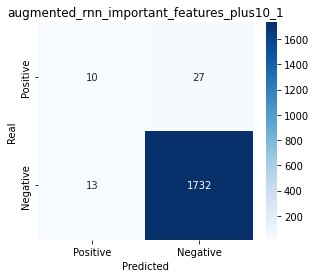

accuracy  : 97.76
precision : [98.47 43.48]
recall    : [99.26 27.03]
f1_score  : [98.86 33.33]

2th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_2of20.h5


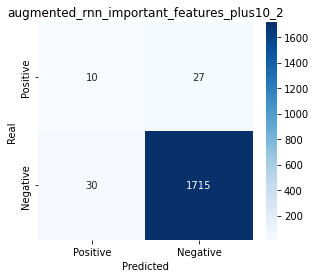

accuracy  : 96.8
precision : [98.45 25.  ]
recall    : [98.28 27.03]
f1_score  : [98.37 25.97]

3th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_3of20.h5


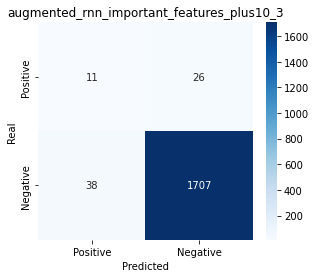

accuracy  : 96.41
precision : [98.5  22.45]
recall    : [97.82 29.73]
f1_score  : [98.16 25.58]

4th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0339622641509434
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_4of20.h5


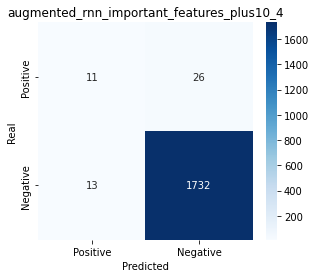

accuracy  : 97.81
precision : [98.52 45.83]
recall    : [99.26 29.73]
f1_score  : [98.89 36.07]

5th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_5of20.h5


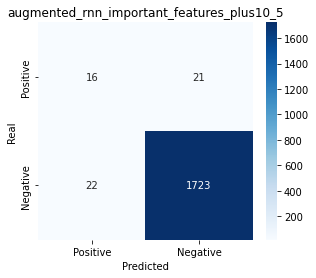

accuracy  : 97.59
precision : [98.8  42.11]
recall    : [98.74 43.24]
f1_score  : [98.77 42.67]

6th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0339622641509434
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_6of20.h5


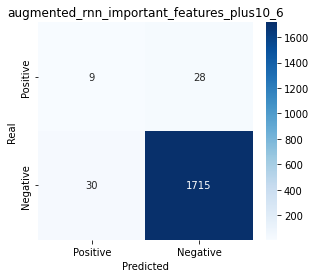

accuracy  : 96.75
precision : [98.39 23.08]
recall    : [98.28 24.32]
f1_score  : [98.34 23.68]

7th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_7of20.h5


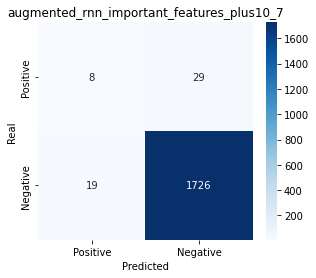

accuracy  : 97.31
precision : [98.35 29.63]
recall    : [98.91 21.62]
f1_score  : [98.63 25.  ]

8th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0030864197530864
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_8of20.h5


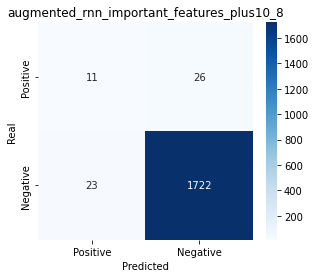

accuracy  : 97.25
precision : [98.51 32.35]
recall    : [98.68 29.73]
f1_score  : [98.6  30.99]

9th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_9of20.h5


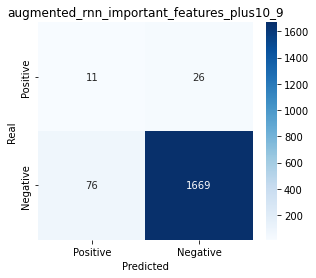

accuracy  : 94.28
precision : [98.47 12.64]
recall    : [95.64 29.73]
f1_score  : [97.03 17.74]

10th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_10of20.h5


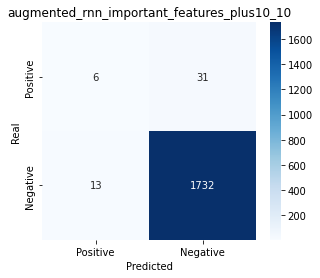

accuracy  : 97.53
precision : [98.24 31.58]
recall    : [99.26 16.22]
f1_score  : [98.75 21.43]

11th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_11of20.h5


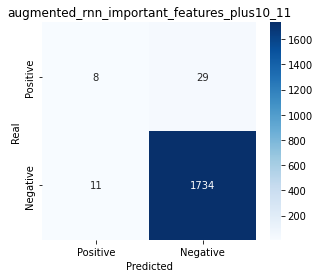

accuracy  : 97.76
precision : [98.36 42.11]
recall    : [99.37 21.62]
f1_score  : [98.86 28.57]

12th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0025929127052722
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_12of20.h5


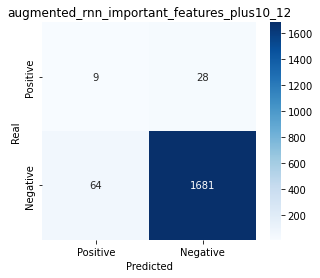

accuracy  : 94.84
precision : [98.36 12.33]
recall    : [96.33 24.32]
f1_score  : [97.34 16.36]

13th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_13of20.h5


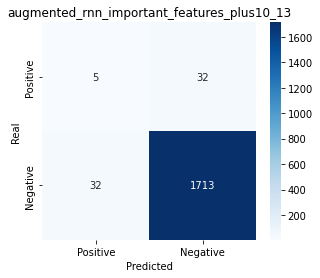

accuracy  : 96.41
precision : [98.17 13.51]
recall    : [98.17 13.51]
f1_score  : [98.17 13.51]

14th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_14of20.h5


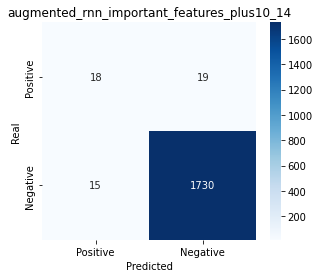

accuracy  : 98.09
precision : [98.91 54.55]
recall    : [99.14 48.65]
f1_score  : [99.03 51.43]

15th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0339622641509434
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_15of20.h5


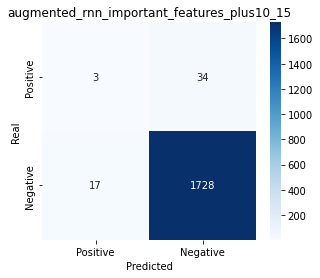

accuracy  : 97.14
precision : [98.07 15.  ]
recall    : [99.03  8.11]
f1_score  : [98.55 10.53]

16th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0339622641509434
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_16of20.h5


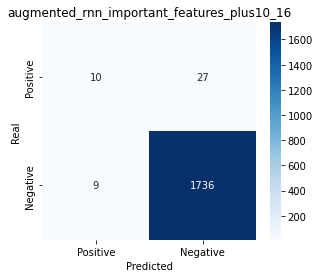

accuracy  : 97.98
precision : [98.47 52.63]
recall    : [99.48 27.03]
f1_score  : [98.97 35.71]

17th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_17of20.h5


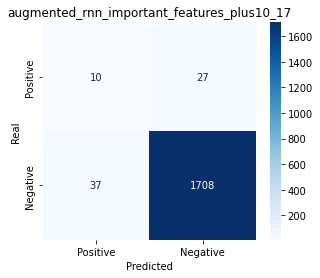

accuracy  : 96.41
precision : [98.44 21.28]
recall    : [97.88 27.03]
f1_score  : [98.16 23.81]

18th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0339622641509434
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_18of20.h5


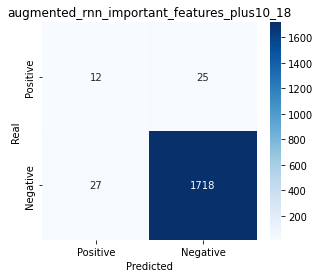

accuracy  : 97.08
precision : [98.57 30.77]
recall    : [98.45 32.43]
f1_score  : [98.51 31.58]

19th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_19of20.h5


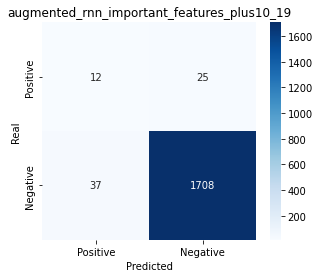

accuracy  : 96.52
precision : [98.56 24.49]
recall    : [97.88 32.43]
f1_score  : [98.22 27.91]

20th iteration
train/test dataset: <class 'numpy.ndarray'>

train: (7128, 21, 64) (7128, 1)
check scale: 0.0 1.0

test: (1782, 21, 64) (1782, 1)
check scale: 0.0 1.0
up-sampled train dataset: (13960, 21, 64) (13960, 1)
model has been restored from ./h5/augmented_rnn_important_features_plus10_2_100_5_100_cv_20of20.h5


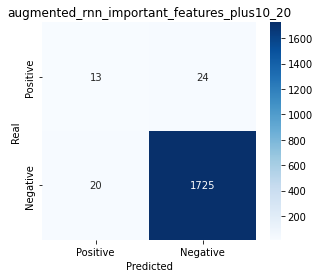

accuracy  : 97.53
precision : [98.63 39.39]
recall    : [98.85 35.14]
f1_score  : [98.74 37.14]


In [9]:
from src.graph_plot import *

for i in range(n_cv):
    print(f"\n{i+1}th iteration")
    random.seed(i+1)
    train_x, train_y, test_x, test_y, _, _ = stratified_split(rnn_input, rnn_output, 
                                                          test_size=test_size, random_state=i+1, 
                                                          scale_x=x_cts, scale_y=[])
    train_x, train_y = up_sampling(train_x, train_y)

    history_size = train_x.shape[1]
    x_dim = train_x.shape[2]
    y_dim = train_y.shape[1]
    save_path  = f'./h5/{model_name}_{rnn_layers}_{rnn_neurons}_{dnn_layers}_{dnn_neurons}_cv_{i+1}of{n_cv}.h5'

    model = RNN(history_size, x_dim, y_dim)
    model.build(rnn_layers, rnn_neurons, dnn_layers, dnn_neurons)
    model.load_model(save_path)
    
    prediction = model.model.predict(test_x, verbose=0)
    y_pred = prediction.round(0).astype(int)
    y_real = test_y
    
    plot_confusion(y_real, y_pred, title=model_name+f"_{i+1}", label=["Positive","Negative"])